# Step 0: Read in the WFC3 Data
In this step we need to read in the .ima files, subtract the first exposure from the last, and sort the exposures by time.

G102 data - From Hannah and Lili's Memo: "In total there are 320 science frames, 160 in forward scan mode and 160 in reverse scan mode. It is recommended that the first orbit and the first exposure from each orbit be removed leaving ~266 frames in total for the lightcurves."

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
import glob
import numpy as np

In [1]:
data_repo = '../data/MAST_2023-08-19T2316/HST/'

In [5]:
G141_exposures = glob.glob(data_repo+'ie*/*ima.fits')
G141_data = [None]*len(G141_exposures)
G141_times = [None]*len(G141_exposures)

In [6]:
G102_exposures = glob.glob(data_repo+'oe*/*ima.fits')
G102_data = [None]*len(G102_exposures)
G102_times = [None]*len(G102_exposures)

# Notes on file structure

HDU[0] is the primary header, indices [1] to [-1] are the exposures.

## Example header keywords:

DATE-OBS= '2021-08-29'         / UT date of start of observation (yyyy-mm-dd)   

TIME-OBS= '04:55:35'           / UT time of start of observation (hh:mm:ss)     

EXPSTART=   5.945520527180E+04 / exposure start time (Modified Julian Date)     

EXPEND  =   5.945520532958E+04 / exposure end time (Modified Julian Date)       

EXPTIME =             4.970405 / exposure duration (seconds)--calculated

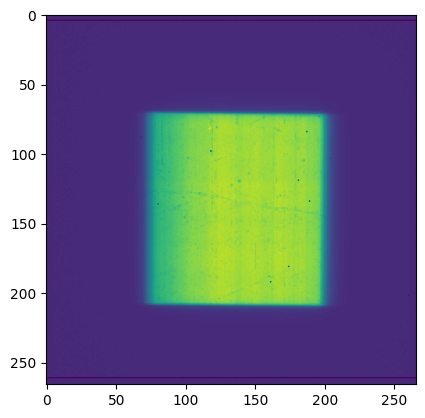

In [8]:
hdul = fits.open(G141_exposures[0]) # This is the fits object of the zeroth file in the globbed array

this_exposure_header = hdul[0].header # This is the master header for all exposures recorded in this file
this_exposure_flux = hdul[1].data # This is a 2D spectrum in wavelength and time
this_time_point = this_exposure_header['EXPSTART'] # The end time of the exposure in MJD
plt.imshow(this_exposure_flux)

In [1]:
i = 0
for _2dspec in G141_exposures:
    hdul = fits.open(_2dspec)
    MJD_date = hdul[0].header['EXPSTART'] #why is it hdul[0] for this exptime, but hdul[1] for the G102 data?
    G141_data[i] = hdul[1].data
    G141_times[i] = MJD_date
    
    i += 1

NameError: name 'G141_exposures' is not defined

In [ ]:
i = 0
for _2dspec in G102_exposures:
    hdul = fits.open(_2dspec)
    MJD_date = hdul[1].header['EXPSTART']
    G102_data[i] = hdul[1].data
    G102_times[i] = MJD_date
    plt.imshow(hdul[1].data)
    plt.show()
    plt.close()
    
    i += 1

In [ ]:
flt_hdul[0].header